Data Set Information:
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH = 'dataset/'

In [3]:
dataset = pd.read_csv(PATH + 'dataset.csv')

In [4]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

In [6]:
dataset.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [7]:
dataset[dataset.isna().any(axis=1)].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False


In [8]:
dataset_no_na = dataset.fillna(0)
dataset_no_na.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

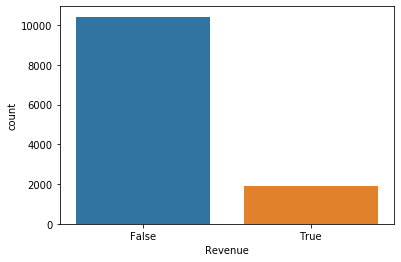

In [9]:
sns.countplot(dataset_no_na['Revenue'])

In [10]:
dataset_no_na['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [11]:
def plot_countplot(features, data, univariate=True, target=None):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    i = 0
    
    if univariate:
        for feature in features:
            i += 1
            plt.subplot(3, 3, i)
            sns.countplot(data[feature])    
    else:
        for feature in features:
            i += 1
            plt.subplot(3, 3, i)
            sns.countplot(data[feature], hue=dataset_no_na[target])   

In [12]:
cat = dataset_no_na.columns[9:-1]

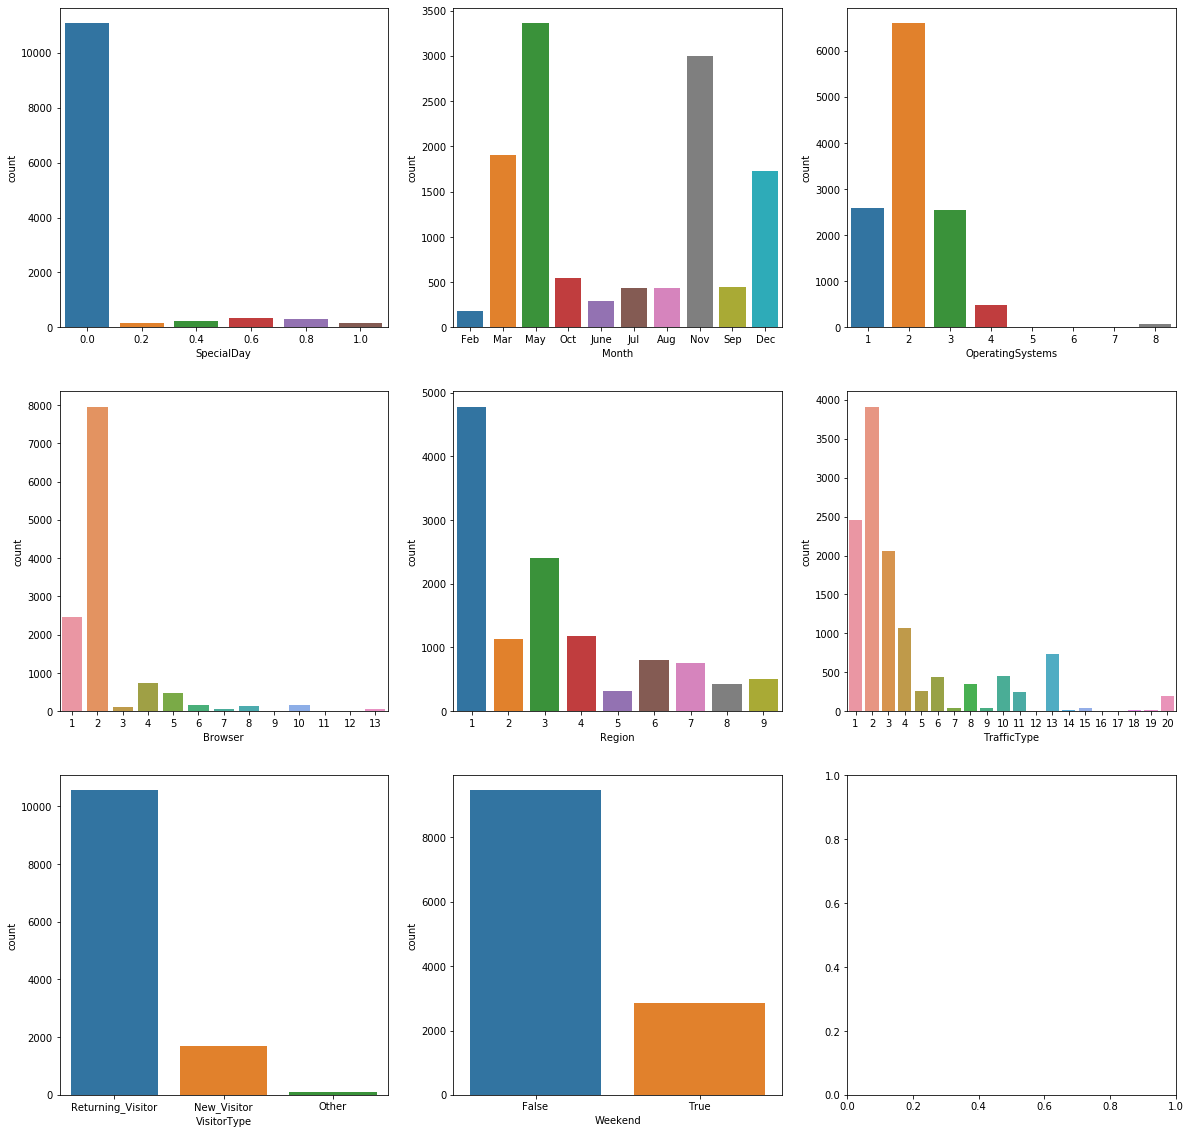

In [13]:
plot_countplot(data=dataset_no_na, features=cat, univariate=True)

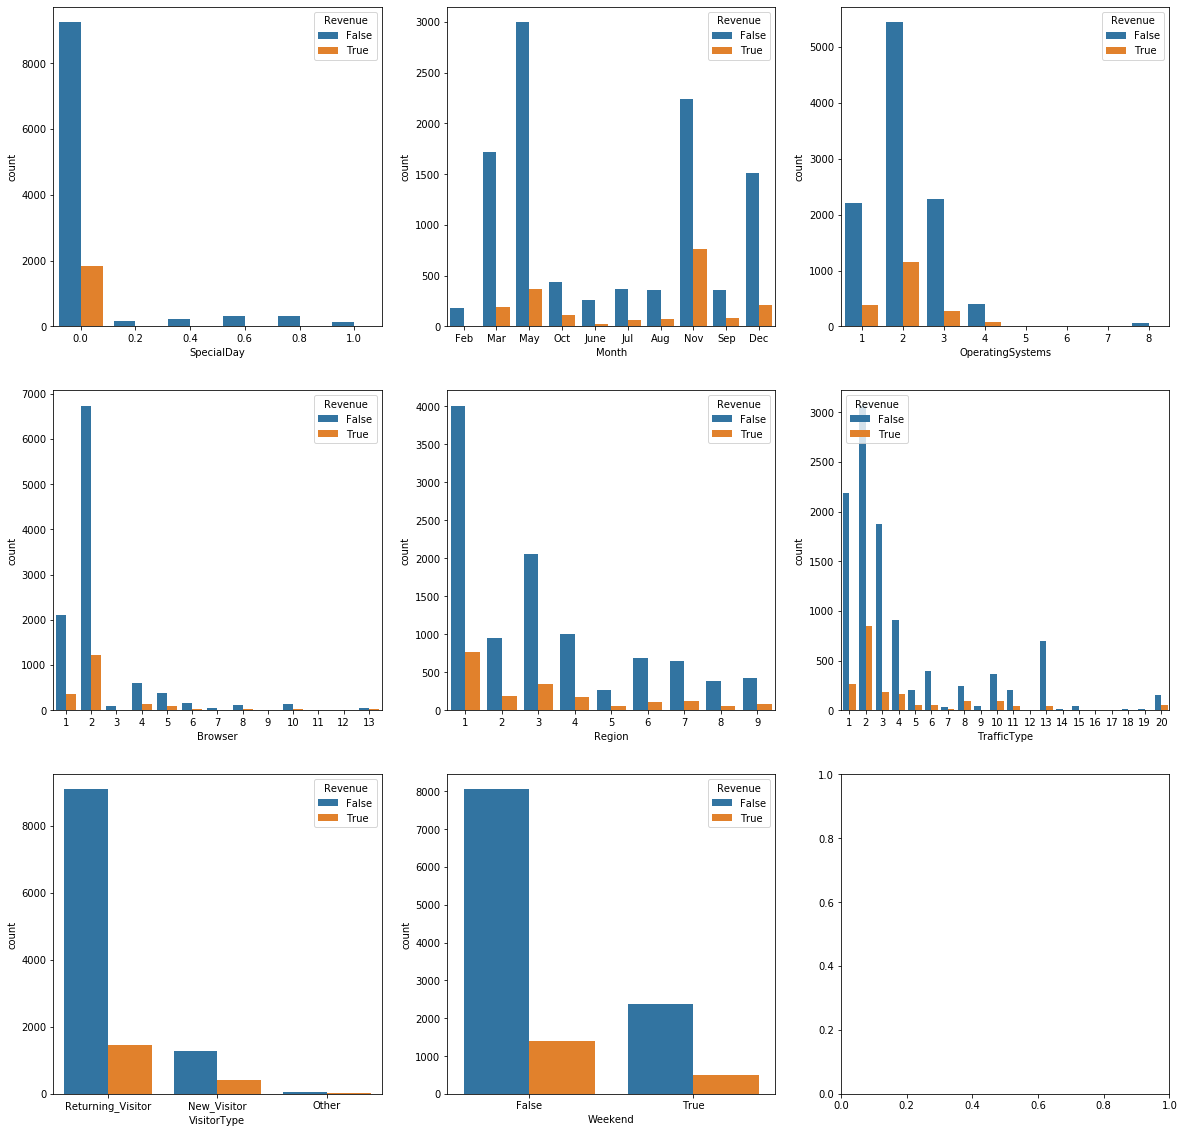

In [14]:
plot_countplot(data=dataset_no_na, features=cat, univariate=False, target='Revenue')

In [15]:
def plot_distplot(features, data, univariate=True, target=None):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    i = 0
    
    if univariate:
        for feature in features:
            i += 1
            plt.subplot(3, 3, i)
            plt.title(feature)
            data[feature].plot(kind='kde')
    else:        
        for feature in features:
            i += 1
            plt.subplot(3, 3, i)
            plt.title(feature)
            data.groupby(target)[feature].plot(kind='kde', legend=True)

In [16]:
cont = dataset_no_na.columns[:9]

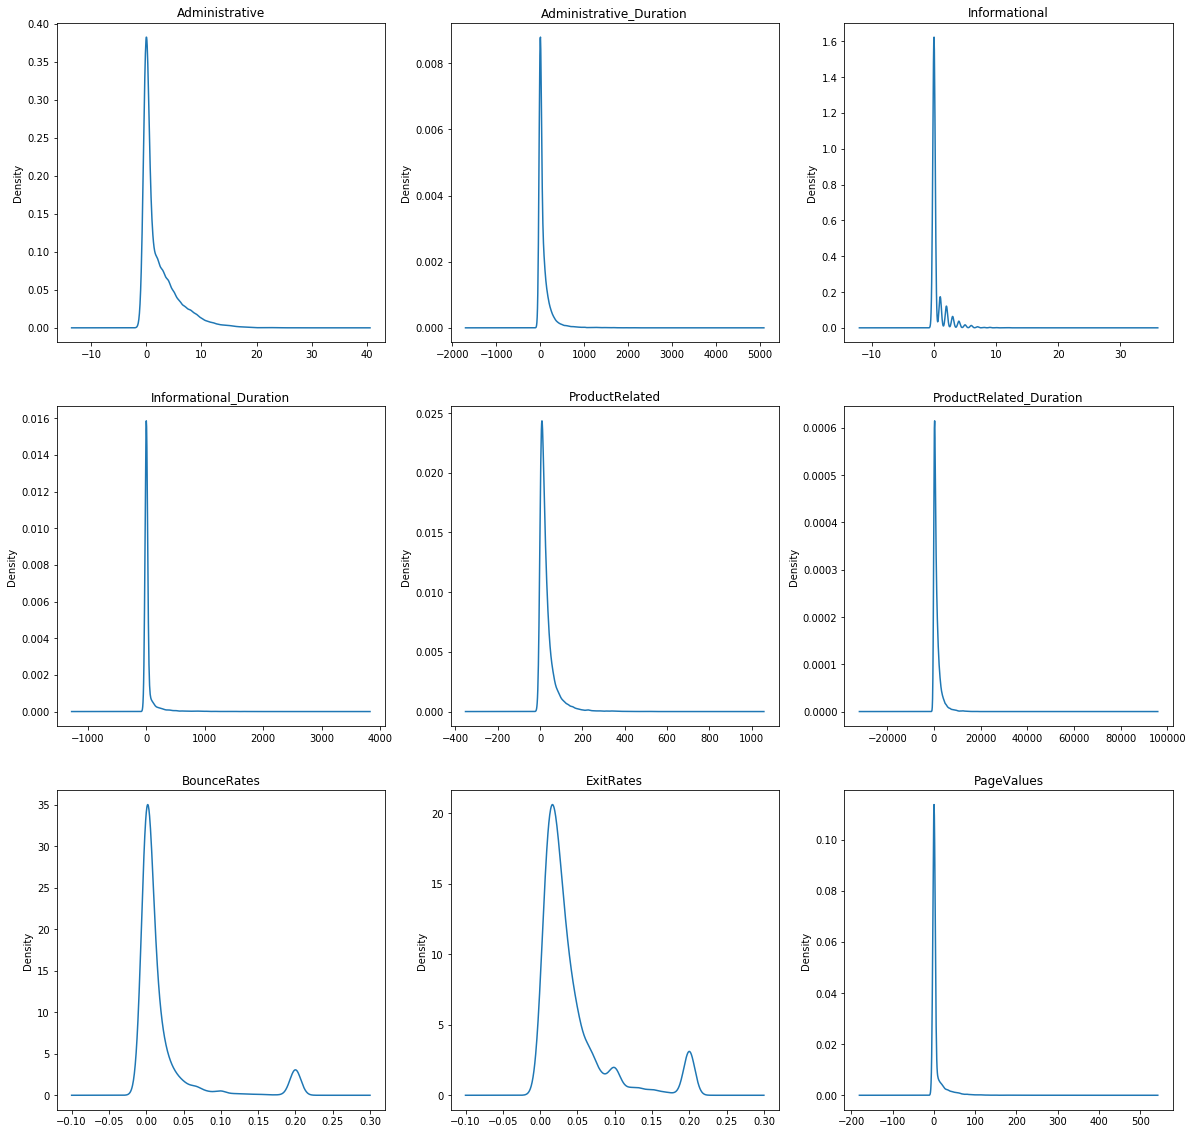

In [17]:
plot_distplot(data=dataset_no_na, features=cont, univariate=True)

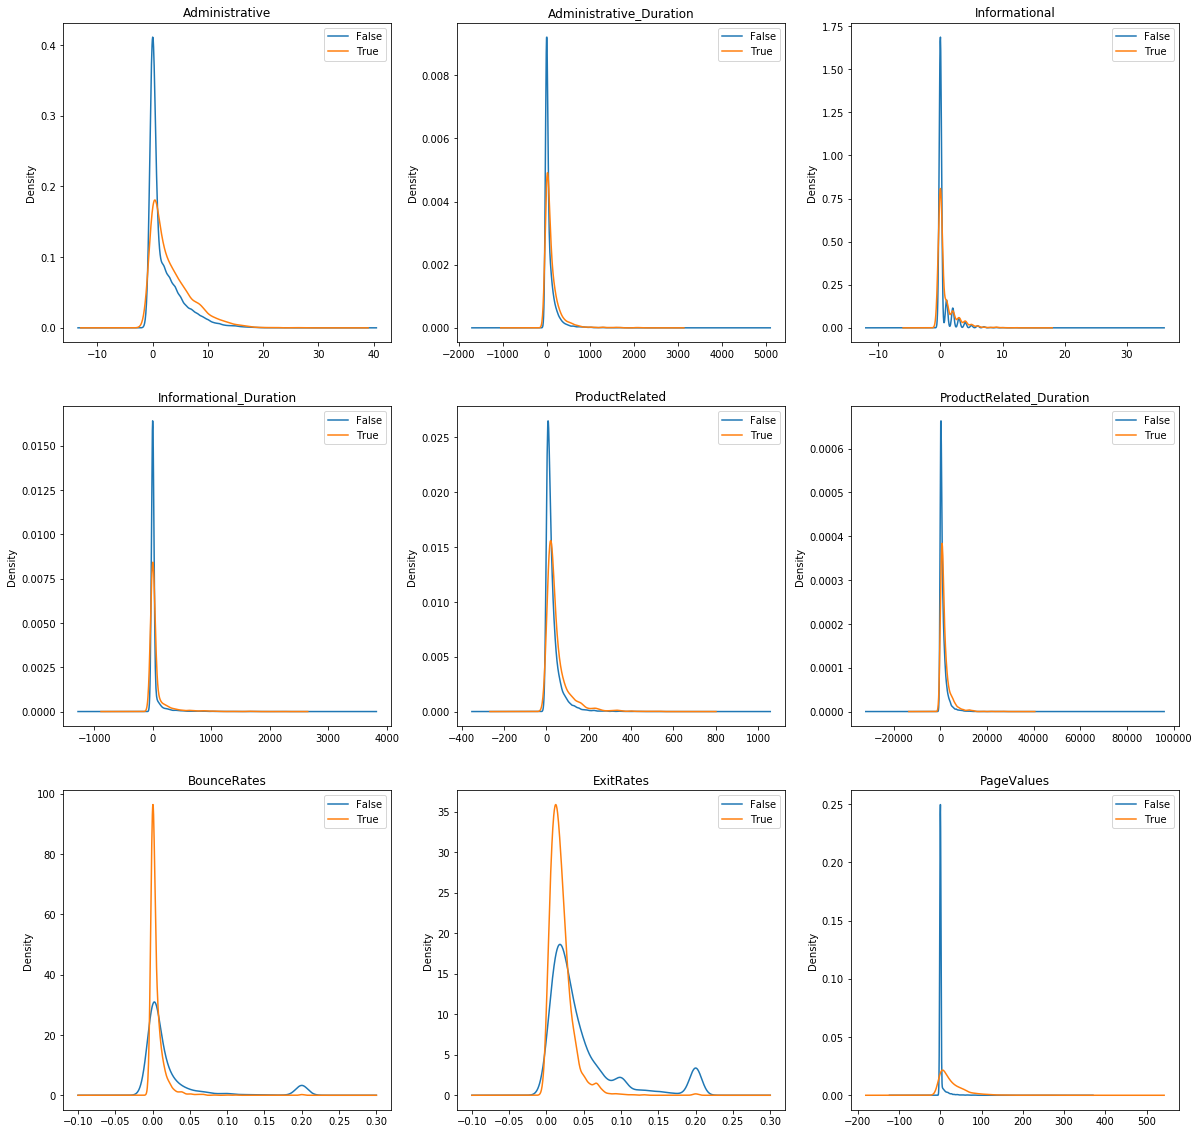

In [18]:
plot_distplot(data=dataset_no_na, features=cont, target='Revenue', univariate=False)

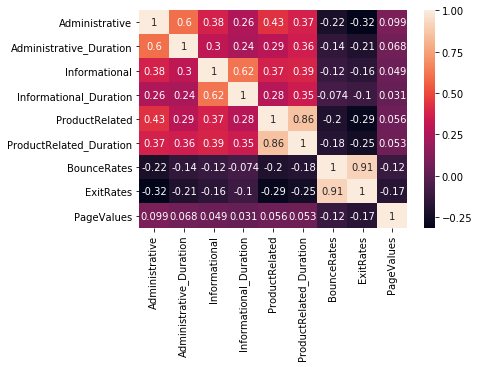

In [19]:
sns.heatmap(data=dataset_no_na.iloc[:, :9].corr(), annot=True)

In [20]:
removed_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates']
filtered_dataset = dataset_no_na.drop(removed_features, axis=1)

In [21]:
dumm_dataset = pd.get_dummies(data=filtered_dataset, columns=filtered_dataset.columns[5:-1])
dumm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 77 columns):
Administrative                   12330 non-null float64
Informational                    12330 non-null float64
ProductRelated                   12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
Revenue                          12330 non-null bool
SpecialDay_0.0                   12330 non-null uint8
SpecialDay_0.2                   12330 non-null uint8
SpecialDay_0.4                   12330 non-null uint8
SpecialDay_0.6                   12330 non-null uint8
SpecialDay_0.8                   12330 non-null uint8
SpecialDay_1.0                   12330 non-null uint8
Month_Aug                        12330 non-null uint8
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June        

In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [23]:
x_train_init, x_test_init, y_train, y_test = train_test_split(dumm_dataset.drop('Revenue', axis=1), dumm_dataset[['Revenue']], test_size=0.9)

In [24]:
scaler = MinMaxScaler()

In [25]:
scaled_train_data = scaler.fit_transform(x_train_init.iloc[:,:5])
x_train = np.concatenate([scaled_train_data, x_train_init.iloc[:,6:].to_numpy()], axis=1)

In [26]:
scaled_test_data = scaler.transform(x_test_init.iloc[:,:5])
x_test = np.concatenate([scaled_test_data, x_test_init.iloc[:,6:].to_numpy()], axis=1)

In [27]:
clfs = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]

In [28]:
kfold = KFold(n_splits=10)

In [29]:
models = {type(clf).__name__:[(clf
       .fit(x_train[train, :], y_train.iloc[train, 0]), 
       clf
       .fit(x_train[train, :], y_train.iloc[train, 0])
       .score(x_train[test, :], y_train.iloc[test, 0])) 
       for train, test in kfold.split(X=x_train)] 
 for clf in clfs}

C:\Anaconda\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\Anaconda\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The defa

In [30]:
top_folds = [(name, max(model, key=lambda x: x[1])) 
 for name, model in models.items()]

In [31]:
best_classifier = max(top_folds, key=lambda x: x[1][1])

In [32]:
best_classifier

('LogisticRegression',
 (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False), 0.9349593495934959))

In [33]:
best_classifier[1][0].score(x_test, y_test)

0.861674326394521

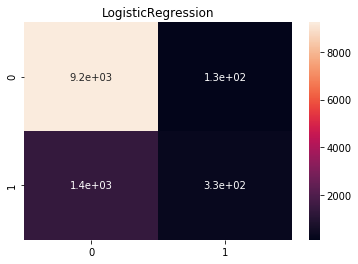

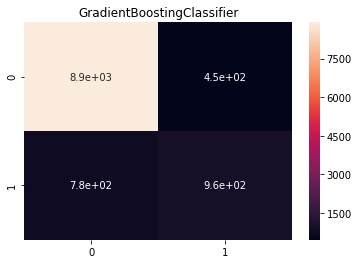

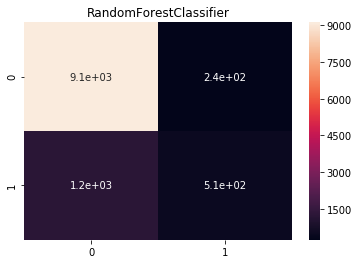

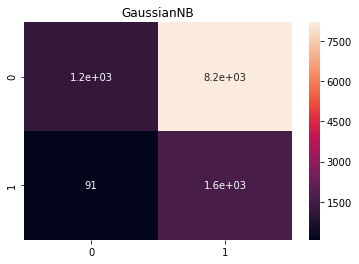

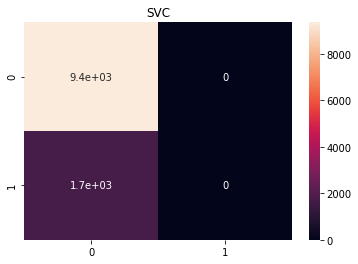

In [34]:
for model in top_folds:
    y_pred = model[1][0].predict(x_test)
    plt.figure()
    plt.title(model[0])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [35]:
for model in top_folds:
    y_pred = model[1][0].predict(x_test)
    print(model[0])
    print(classification_report(y_test, y_pred))

LogisticRegression
              precision    recall  f1-score   support

       False       0.87      0.99      0.92      9360
        True       0.72      0.19      0.30      1737

    accuracy                           0.86     11097
   macro avg       0.79      0.59      0.61     11097
weighted avg       0.84      0.86      0.83     11097

GradientBoostingClassifier
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      9360
        True       0.68      0.55      0.61      1737

    accuracy                           0.89     11097
   macro avg       0.80      0.75      0.77     11097
weighted avg       0.88      0.89      0.88     11097

RandomForestClassifier
              precision    recall  f1-score   support

       False       0.88      0.97      0.93      9360
        True       0.68      0.29      0.41      1737

    accuracy                           0.87     11097
   macro avg       0.78      0.63      0.67     11097
weigh

C:\Anaconda\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
